In [1]:
!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
#defining the column names
cols=['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin']

In [13]:
#reading the data file using the pandas
df=pd.read_csv('./auto-mpg.data', na_values = "?",
                comment = '\t',
                sep= " ",
                skipinitialspace=True,names=cols)

df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [14]:
data=df.copy()

## Problem Statement — 

The data contains the MPG(Mile Per Gallon) variable which is continuous data and tells us about the efficiency of fuel consumption of a vehicle in the 70s and 80s.

## Aim— 

Our aim here is to predict the MPG value for a vehicle given we have other attributes of that vehicle.

### EDA

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [18]:
#Checking for null values

data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

The horsepower column has 6 missing values. We’ll have to study the column a bit more.

##### 3. Check for outliers in hoursepower column

In [19]:
##summary statistics of quantitative variables
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


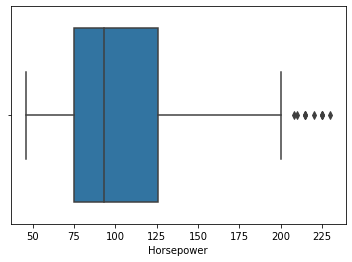

In [27]:
##looking at hoursepower box plot
sns.boxplot(x=data['Horsepower'])

Since there are a few outliers, we can use the median of the column to impute the missing values using the pandas median() method.

In [40]:
##imputing the values with median
median=data['Horsepower'].median()
data['Horsepower'].fillna(value=median,inplace=True)

In [43]:
data['Horsepower'].isna().sum()

0

#### 4. Look for the category distrubution in categorical columns 

In [45]:
##category distribution 
data['Cylinders'].value_counts()/len(data)

4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: Cylinders, dtype: float64

In [46]:
data['Origin'].value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

The 2 categorical columns are Cylinders and Origin which only have a few categories of values. Looking at the distribution of the values among these categories will tell us how the data is distributed:

In [49]:
data['Origin'].value_counts()/len(data)

1    0.625628
3    0.198492
2    0.175879
Name: Origin, dtype: float64

### 5.Plot for correlation 

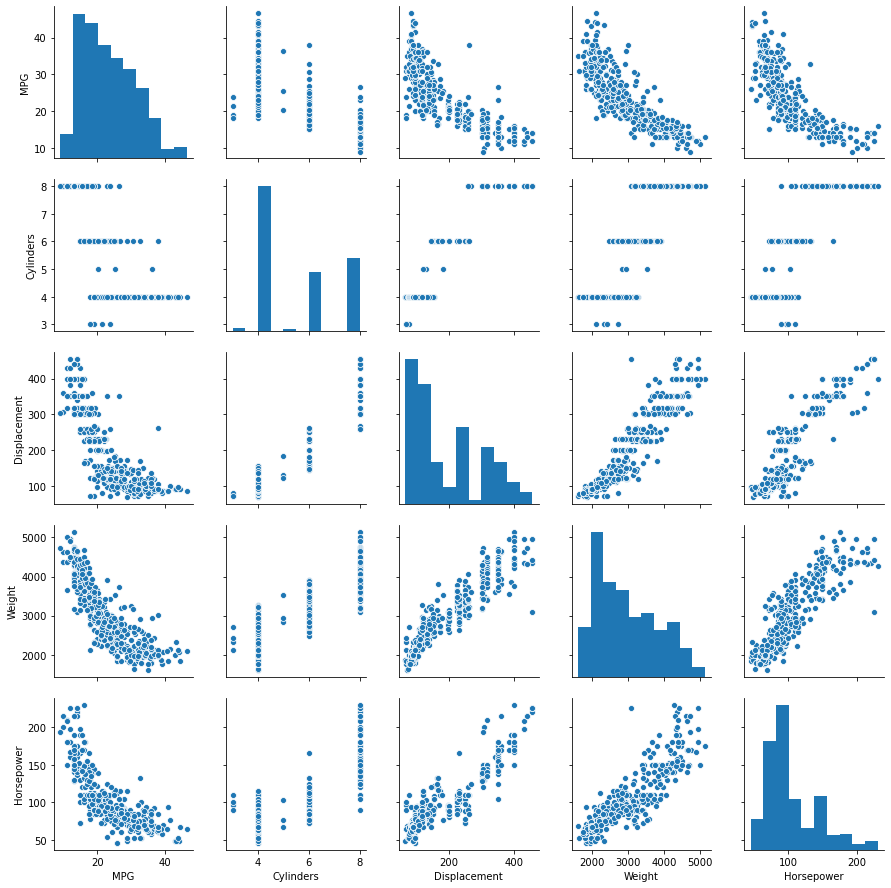

In [55]:
##pairplots to get an intuition of potential correlations 
data.columns

sns.pairplot(data[["MPG","Cylinders","Displacement","Weight","Horsepower"]])

### For example, the MPG column(our target variable) is negatively correlated with Displacement, weight, and horsepower features.

## 6. Splitting the train and Test data

There are many ways to split the data into training and testing sets but we want our test set to represent the overall population and not just a few specific categories. Thus, instead of using simple and common train_test_split() method from sklearn, we use stratified sampling.

#### **Stratified Sampling — 


We create homogeneous subgroups called strata from the overall population and sample the right number of instances to each stratum to ensure that the test set is representative of the overall population.

In [60]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(data,data['Cylinders']):
    strat_train_set=data.loc[train_index]
    strat_test_set=data.loc[test_index]

In [61]:
##checking for cylinder category distribution in training set
strat_train_set['Cylinders'].value_counts() / len(strat_train_set)

4    0.512579
8    0.257862
6    0.210692
5    0.009434
3    0.009434
Name: Cylinders, dtype: float64

In [62]:
strat_test_set["Cylinders"].value_counts() / len(strat_test_set)

4    0.5125
8    0.2625
6    0.2125
3    0.0125
Name: Cylinders, dtype: float64

In [69]:
data.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin'],
      dtype='object')

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data[['Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin']],data['MPG'],test_size=0.2)

In [78]:
x_train['Cylinders'].value_counts() / len(x_train)

4    0.496855
8    0.264151
6    0.220126
3    0.012579
5    0.006289
Name: Cylinders, dtype: float64

In [79]:
x_test['Cylinders'].value_counts() / len(x_test)

4    0.5750
8    0.2375
6    0.1750
5    0.0125
Name: Cylinders, dtype: float64

## 7. Checking the Origin Column

In [81]:
#converting the values into the countries origin name
strat_train_set['Origin']=strat_train_set['Origin'].map({1:'India',2:'USA',3:'Germany'})

In [82]:
strat_train_set['Origin'].value_counts()

India      198
USA         60
Germany     60
Name: Origin, dtype: int64

In [83]:
strat_train_set.sample(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
335,35.0,4,122.0,88.0,2500.0,15.1,80,USA
311,32.1,4,98.0,70.0,2120.0,15.5,80,India
180,25.0,4,121.0,115.0,2671.0,13.5,75,USA
337,32.4,4,107.0,72.0,2290.0,17.0,80,Germany
38,14.0,8,350.0,165.0,4209.0,12.0,71,India
167,29.0,4,97.0,75.0,2171.0,16.0,75,Germany
199,20.0,6,225.0,100.0,3651.0,17.7,76,India
384,32.0,4,91.0,67.0,1965.0,15.7,82,Germany
393,27.0,4,140.0,86.0,2790.0,15.6,82,India
270,21.1,4,134.0,95.0,2515.0,14.8,78,Germany


In [88]:
train_data=pd.get_dummies(strat_train_set,prefix='',prefix_sep='')
train_data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Germany,India,USA
145,32.0,4,83.0,61.0,2003.0,19.0,74,1,0,0
151,31.0,4,79.0,67.0,2000.0,16.0,74,0,0,1
388,26.0,4,156.0,92.0,2585.0,14.5,82,0,1,0
48,18.0,6,250.0,88.0,3139.0,14.5,71,0,1,0
114,26.0,4,98.0,90.0,2265.0,15.5,73,0,0,1


#### 8. Testing for new variables - Analyze the correlations of each variable with the Target variables

In [89]:
data['displacement_on_power'] = data['Displacement'] / data['Horsepower']
data['weight_on_cylinder'] = data['Weight'] / data['Cylinders']
data['acceleration_on_power'] = data['Acceleration'] / data['Horsepower']
data['acceleration_on_cyl'] = data['Acceleration'] / data['Cylinders']

In [92]:
corr_matrix=data.corr()
corr_matrix['MPG'].sort_values(ascending=False)

MPG                      1.000000
acceleration_on_cyl      0.732133
acceleration_on_power    0.704240
Model Year               0.579267
Origin                   0.563450
Acceleration             0.420289
weight_on_cylinder      -0.020778
displacement_on_power   -0.577236
Horsepower              -0.773453
Cylinders               -0.775396
Displacement            -0.804203
Weight                  -0.831741
Name: MPG, dtype: float64

We found acceleration_on_power and acceleration_on_cyl as 2 new variables which turned out to be more positively correlated than the original variables.